In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [73]:
from sklearn.linear_model import LinearRegression

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [74]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

Creating a numpy array of data

In [75]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

Fitting Linear regression model

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

In [77]:
r_sq = model.score(X,y)
slope = model.coef_
intercept = model.intercept_
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6922946529147003
intercept: 22.848982308066887
slope: [3.410323]


In [78]:
y_pred = model.predict(X)

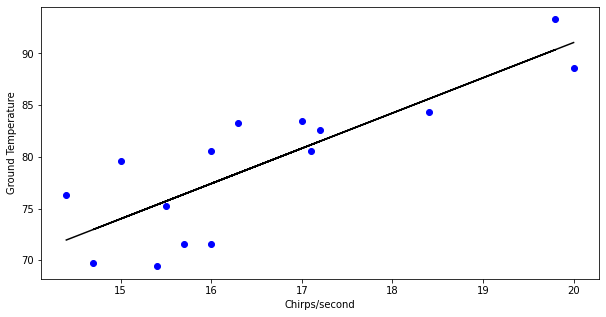

In [79]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color ='blue')
plt.plot(X, y_pred, color = 'black')
#plt.text(5, 2, 'y ={}x+{}'.format(round(slope[0], 2), round(intercept, 2)), fontsize = 20)
plt.xlabel('Chirps/second')
plt.ylabel('Ground Temperature')
plt.show()

In [80]:
# prediction 1 - Extrapolate data, temp = 95, what is the chirps/second?
# Equation -> y = slope*x + intercept, y->temp, x-> ?
temp = 95
chirps_pred = (temp-intercept)/slope
print('The approximate chirping rate of cricket when temperature is 95 is:',chirps_pred[0], 'chirps/second')

The approximate chirping rate of cricket when temperature is 95 is: 21.156652229784402 chirps/second


In [81]:
# Prediction 2 - Interpolate data, temp = ?, when chirps/second is 18
temp = model.predict([[18]])
print('The approx ground temperature at 18 chirps/second is:',temp[0], 'F')

The approx ground temperature at 18 chirps/second is: 84.23479629930205 F


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [82]:
df = pd.read_fwf("/content/brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [83]:
df.columns

Index(['Brain', 'Body'], dtype='object')

# Without outlier removal

In [84]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [85]:
def score(X,y):
  model = LinearRegression().fit(X, y)
  r_sq = model.score(X,y)
  return model, r_sq  

model, r_sq = score(X,y)

slope = model.coef_
intercept = model.intercept_
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8726620843043331
intercept: 91.00439620740687
slope: [0.96649637]


The R2 for the model without the removal of outlier is 0.87 which can be considered as a good fit.

In [86]:
y_pred = model.predict(X)

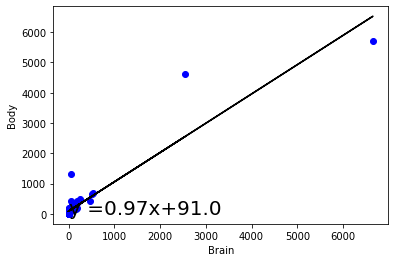

In [87]:
plt.scatter(X, y, color ='blue')
plt.plot(X, y_pred, color = 'black')
plt.text(15, 5, 'y ={}x+{}'.format(round(slope[0], 2), round(intercept, 2)), fontsize = 20)
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

# With outlier removal

The dataset might get biased or the accuracy might be increased due to the presence of outlier. It needs to be removed. Here, I have used Inter-Quartile range to remove the outliers present in the dataset.

In [88]:
def remove_outlier(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [89]:
for i in df.columns:
  lower,upper = remove_outlier(df[i])
  df.drop(df[ (df[i] > upper) | (df[i] < lower) ].index , inplace=True)

In [90]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [91]:
def score(X,y):
  model = LinearRegression().fit(X, y)
  r_sq = model.score(X,y)
  return model, r_sq  

model, r_sq = score(X,y)

In [92]:
slope = model.coef_
intercept = model.intercept_
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5363132574949199
intercept: 12.03254410960833
slope: [2.07729311]


The R2 score is not around 0.53 which is less compared with the data without the removal of outlier. This is not a good fit for the model.

In [93]:
y_pred = model.predict(X)

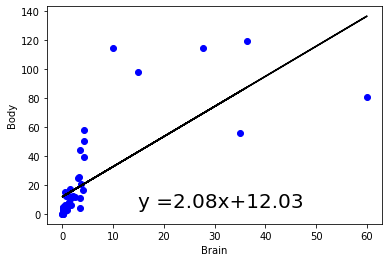

In [94]:
plt.scatter(X, y, color ='blue')
plt.plot(X, y_pred, color = 'black')
plt.text(15, 5, 'y ={}x+{}'.format(round(slope[0], 2), round(intercept, 2)), fontsize = 20)
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [95]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [96]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [97]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [98]:
import itertools as it

In [99]:
feature_columns = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [100]:
def linreg(feature_columns, df):
  X = df[feature_columns]
  y = df['Salary']
  model = LinearRegression().fit(X,y)
  print('The equation for feature {} with respect to salary:\n'
  '{} + {}'.format(feature_columns, model.coef_, model.intercept_))

In [101]:
linreg(feature_columns, df)

The equation for feature ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [102]:
# Finding R^2 score for all the features with respect to target variable salary

def linreg_score(feature_columns, df):
  X = df[feature_columns]
  y = df['Salary']
  model = LinearRegression().fit(X,y)
  r2_score = model.score(X,y)
  return r2_score

In [103]:
r2_score = linreg_score(feature_columns, df)
print('The r2_score for mulitple feature is:', r2_score)

The r2_score for mulitple feature is: 0.8547180674410969


In [104]:
# To find the R2 score for all combinations and do feature selection

In [105]:
def combination(cols):
  return [it.combinations(cols, n+1) for n in range(len(cols))]

In [106]:
all_combos = combination(feature_columns)

In [107]:
def all_combo_scores(all_combos, df):
  combo_scores = {}
  for m in range(len(list(all_combos))):
    for n in list(all_combos[m]):
      combo_scores[linreg_score(list(n), df)] = n
  return combo_scores

In [108]:
total_scores = all_combo_scores(all_combos, df)

In [109]:
total_scores

{0.004861680984748373: ('Degree',),
 0.06389892583288004: ('Sex',),
 0.06643739842018881: ('Sex', 'Degree'),
 0.45542813458360276: ('YSdeg',),
 0.49093702676921624: ('Year',),
 0.4911360941886388: ('Sex', 'Year'),
 0.4919014149016441: ('Year', 'Degree'),
 0.49207944757472966: ('Sex', 'Year', 'Degree'),
 0.4930479271966782: ('Sex', 'YSdeg'),
 0.5409662288237875: ('Degree', 'YSdeg'),
 0.5782019226431887: ('Year', 'YSdeg'),
 0.5808063918180405: ('Sex', 'Year', 'YSdeg'),
 0.5832708257660315: ('Sex', 'Degree', 'YSdeg'),
 0.6236261611533503: ('Year', 'Degree', 'YSdeg'),
 0.6311597502907436: ('Sex', 'Year', 'Degree', 'YSdeg'),
 0.7525360539274633: ('Rank',),
 0.7554917749443395: ('Sex', 'Rank'),
 0.7557961688386643: ('Rank', 'Degree'),
 0.7583144768153613: ('Sex', 'Rank', 'Degree'),
 0.7623948189698249: ('Rank', 'YSdeg'),
 0.7625149185326454: ('Rank', 'Degree', 'YSdeg'),
 0.7666122610227071: ('Sex', 'Rank', 'YSdeg'),
 0.7671813414350668: ('Sex', 'Rank', 'Degree', 'YSdeg'),
 0.8436480933264597

From the above combination of scores, we can see that the feature 'Sex' along contributes to only 0.0063 score. This indicates that it alone has no direct influence on salary.